In [1]:
from sklearn import preprocessing
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as mp
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from imblearn.over_sampling import SMOTE
from transformers import AutoTokenizer, AutoModelForMaskedLM
from sentence_transformers import SentenceTransformer
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from scipy.stats import randint
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Loading Data & Labeling

In [2]:
embeds = pd.read_excel('training_mathbert.xlsx')
#Class labelling
# 0-3 incorrect
# 3-4 part correct
# 4-5 correct

def classes(marks):
    if (0<=marks<3):
        return 'incorrect'
    elif (3<=marks<4):
        return 'partially correct'
    elif (4<=marks<=5):
        return 'correct'

embeds['class'] = embeds['output'].apply(classes)

def labelenc(x):
    if(x=='incorrect'):
        return 0
    elif(x=='partially correct'):
        return 1
    if(x=='correct'):
        return 2

embeds['class_encoded'] = embeds['class'].apply(labelenc)
embeds.to_excel('Labelled.xlsx', index=False)
embeds

embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0    -0.089926  0.343874  0.176382  0.169358 -0.413337 -0.276315  0.188070   
1     0.303261  0.084930  0.047369 -0.017244 -0.524733 -0.104934  0.335107   
2    -0.274291  0.216801  0.029110  0.259279 -0.655594 -0.289643  0.073369   
3     0.118676  0.095572  0.157358  0.225097 -0.632885 -0.125629  0.204013   
4     0.298772  0.300674  0.366119 -0.022142 -0.748852 -0.035268  0.277504   
...        ...       ...       ...       ...       ...       ...       ...   
1121 -0.316305  0.126331  0.084587  0.099225 -0.503260 -0.062559  0.115574   
1122 -0.342471  0.060391 -0.009947  0.156623 -0.511338 -0.070624  0.140290   
1123 -0.379174  0.197136  0.149639  0.060261 -0.347212 -0.064022  0.119379   
1124 -0.379726  0.075891  0.100093  0.118006 -0.429774 -0.140415  0.120826   
1125 -0.279187  0.099571  0.229438  0.197775 -0.326235 -0.254882 -0.000509   

       embed_7   embed_8   embed_9  ...  embed_377  embed_378  embed_379  \
0     0.094621  0.330203 -0.258730  ...   0.173143  -0.259786  -0.316996   
1    -0.081476  0.213762 -0.105293  ...   0.129022  -0.008138  -0.220774   
2     0.014463  0.104336 -0.014190  ...  -0.118993  -0.046860   0.010008   
3     0.074028  0.149310 -0.147779  ...   0.236099  -0.286450  -0.130198   
4     0.075697  0.055439 -0.200804  ...   0.296528  -0.526185  -0.251471   
...        ...       ...       ...  ...        ...        ...        ...   
1121  0.012244  0.254925 -0.056957  ...   0.013955  -0.030025  -0.306975   
1122  0.027731  0.275638 -0.068072  ...   0.061882  -0.190783  -0.323777   
1123  0.019028  0.268377 -0.188386  ...   0.093440  -0.093673  -0.271739   
1124  0.074879  0.154743 -0.030652  ...   0.052585  -0.172558  -0.218717   
1125  0.034733  0.283212 -0.207798  ...  -0.012660   0.011353  -0.323538   

      embed_380  embed_381  embed_382  embed_383  output      class  \
0     -0.389919   0.105596   0.196438   0.117199     0.0  incorrect   
1     -0.021343  -0.029695   0.335977  -0.197539     0.0  incorrect   
2     -0.118400  -0.085768   0.512956   0.023334     0.0  incorrect   
3     -0.051258  -0.047492   0.241473  -0.095162     0.0  incorrect   
4      0.196795  -0.101786   0.570922   0.007743     0.0  incorrect   
...         ...        ...        ...        ...     ...        ...   
1121   0.139429  -0.256867   0.331288  -0.045333     5.0    correct   
1122   0.185546  -0.144995   0.347215  -0.024521     5.0    correct   
1123   0.042851  -0.143179   0.410811  -0.105163     5.0    correct   
1124   0.201938  -0.085569   0.345646  -0.032904     5.0    correct   
1125   0.055882   0.001314   0.474825  -0.055474     5.0    correct   

      class_encoded  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
1121              2  
1122              2  
1123              2  
1124              2  
1125              2  

[1126 rows x 387 columns]

# X & Y

In [8]:
numeric = embeds.copy()
numeric.drop(['class', 'output'], axis=1, inplace=True)
numeric.head()

embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.089926  0.343874  0.176382  0.169358 -0.413337 -0.276315  0.188070   
1  0.303261  0.084930  0.047369 -0.017244 -0.524733 -0.104934  0.335107   
2 -0.274291  0.216801  0.029110  0.259279 -0.655594 -0.289643  0.073369   
3  0.118676  0.095572  0.157358  0.225097 -0.632885 -0.125629  0.204013   
4  0.298772  0.300674  0.366119 -0.022142 -0.748852 -0.035268  0.277504   

    embed_7   embed_8   embed_9  ...  embed_375  embed_376  embed_377  \
0  0.094621  0.330203 -0.258730  ...  -0.272278  -0.230662   0.173143   
1 -0.081476  0.213762 -0.105293  ...  -0.310262  -0.090271   0.129022   
2  0.014463  0.104336 -0.014190  ...  -0.464926  -0.117493  -0.118993   
3  0.074028  0.149310 -0.147779  ...  -0.030543  -0.100965   0.236099   
4  0.075697  0.055439 -0.200804  ...  -0.149575  -0.230057   0.296528   

   embed_378  embed_379  embed_380  embed_381  embed_382  embed_383  \
0  -0.259786  -0.316996  -0.389919   0.105596   0.196438   0.117199   
1  -0.008138  -0.220774  -0.021343  -0.029695   0.335977  -0.197539   
2  -0.046860   0.010008  -0.118400  -0.085768   0.512956   0.023334   
3  -0.286450  -0.130198  -0.051258  -0.047492   0.241473  -0.095162   
4  -0.526185  -0.251471   0.196795  -0.101786   0.570922   0.007743   

   class_encoded  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 385 columns]

In [13]:
X = numeric.iloc[0:, 0:-1]
X = pd.DataFrame(X)
X.head()

embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.089926  0.343874  0.176382  0.169358 -0.413337 -0.276315  0.188070   
1  0.303261  0.084930  0.047369 -0.017244 -0.524733 -0.104934  0.335107   
2 -0.274291  0.216801  0.029110  0.259279 -0.655594 -0.289643  0.073369   
3  0.118676  0.095572  0.157358  0.225097 -0.632885 -0.125629  0.204013   
4  0.298772  0.300674  0.366119 -0.022142 -0.748852 -0.035268  0.277504   

    embed_7   embed_8   embed_9  ...  embed_374  embed_375  embed_376  \
0  0.094621  0.330203 -0.258730  ...   0.544121  -0.272278  -0.230662   
1 -0.081476  0.213762 -0.105293  ...   0.238566  -0.310262  -0.090271   
2  0.014463  0.104336 -0.014190  ...   0.376746  -0.464926  -0.117493   
3  0.074028  0.149310 -0.147779  ...   0.021368  -0.030543  -0.100965   
4  0.075697  0.055439 -0.200804  ...  -0.060740  -0.149575  -0.230057   

   embed_377  embed_378  embed_379  embed_380  embed_381  embed_382  embed_383  
0   0.173143  -0.259786  -0.316996  -0.389919   0.105596   0.196438   0.117199  
1   0.129022  -0.008138  -0.220774  -0.021343  -0.029695   0.335977  -0.197539  
2  -0.118993  -0.046860   0.010008  -0.118400  -0.085768   0.512956   0.023334  
3   0.236099  -0.286450  -0.130198  -0.051258  -0.047492   0.241473  -0.095162  
4   0.296528  -0.526185  -0.251471   0.196795  -0.101786   0.570922   0.007743  

[5 rows x 384 columns]

In [14]:
Y = numeric.iloc[0:, -1]
Y = pd.DataFrame(Y)
Y.head()

class_encoded
0              0
1              0
2              0
3              0
4              0

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)

# Principal Component Analysis

In [16]:

# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
 
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
 
# Determine the number of components needed to explain at least 0.98 (98%) variance
n_components = np.argmax(cumulative_explained_variance >= 0.98)
print("Number of components explaining 98% variance:", n_components)
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
 
# Create a DataFrame
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
 
# Print the transformed data
X_pca

X_pca.to_excel('Mathbert_PCA.xlsx')

Number of components explaining 98% variance: 145


# Train-Test Split

In [34]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_pca, Y, test_size=0.3)
Y_train_pca = pd.DataFrame(Y_train_pca)
Y_test_pca = pd.DataFrame(Y_test_pca)
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

# Class samples

In [17]:
print("The number of samples for class 0 (incorrect) = ", len(Y[Y['class_encoded']==0]))
print("The number of samples for class 1 (partially correct) = ", len(Y[Y['class_encoded']==1]))
print("The number of samples for class 2 (correct) = ", len(Y[Y['class_encoded']==2]))

The number of samples for class 0 (incorrect) =  483
The number of samples for class 1 (partially correct) =  317
The number of samples for class 2 (correct) =  326


# Class DensityPattern

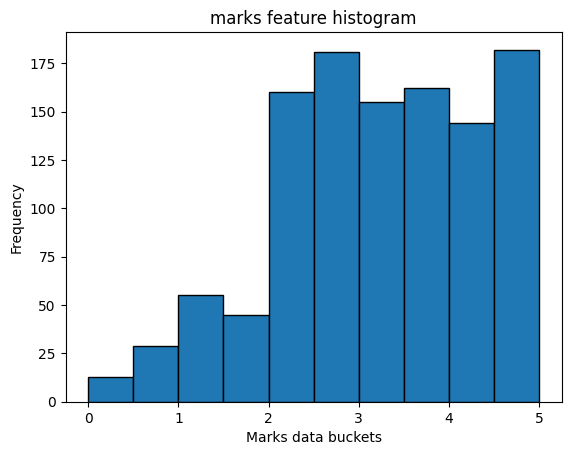

In [18]:
feature = embeds['output']
counts, bin_edges = np.histogram(feature, bins=10)
mp.hist(feature, bins=10, edgecolor='k')
mp.xlabel('Marks data buckets')
mp.ylabel('Frequency')
mp.title('marks feature histogram')
mp.show()

#Density pattern:
#it shows that most people scored between 2.5 to 3 and between 4.5 to 5
#there is narrow distribution between the buckets so the spread is less


## Cross Validation Function

In [19]:
def crossvalidation(model_name,X,Y):
    # Define the scoring metrics
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1_score': make_scorer(f1_score, average='weighted')
    }
    
    cv = KFold(n_splits=10, random_state=42, shuffle=True)

    # Perform cross-validation
    cv_results = cross_validate(model_name, X, Y, scoring=scoring, cv=cv, n_jobs=-1)
    
    # Extract and print results
    accuracy_mean = cv_results['test_accuracy'].mean()
    accuracy_std = cv_results['test_accuracy'].std()
    
    precision_mean = cv_results['test_precision'].mean()
    precision_std = cv_results['test_precision'].std()
    
    recall_mean = cv_results['test_recall'].mean()
    recall_std = cv_results['test_recall'].std()
    
    f1_score_mean = cv_results['test_f1_score'].mean()
    f1_score_std = cv_results['test_f1_score'].std()
    
    print('Accuracy: Mean -', accuracy_mean, ' Std -', accuracy_std)
    print('Precision: Mean -', precision_mean, ' Std -', precision_std)
    print('Recall: Mean -', recall_mean, ' Std -', recall_std)
    print('F1 Score: Mean -', f1_score_mean, ' Std -', f1_score_std)
    

# CLASSIFICATION MODELS

## 1) K Nearest Neighbours

In [30]:
model_knn = KNeighborsClassifier(n_neighbors=23 , weights='distance', algorithm='auto', leaf_size=1, p=2, metric='euclidean', metric_params=None, n_jobs=-1)

model_knn.fit(X_train, Y_train)
predictions = model_knn.predict(X_test)
print('Accuracy score:', accuracy_score(Y_test, predictions))
print('Confusion Matrix:', confusion_matrix(Y_test, predictions))
print('Classification Report:', classification_report(Y_test, predictions))

Accuracy score: 0.5443786982248521
Confusion Matrix: [[91 30 28]
 [28 31 26]
 [26 16 62]]
Classification Report:               precision    recall  f1-score   support

           0       0.63      0.61      0.62       149
           1       0.40      0.36      0.38        85
           2       0.53      0.60      0.56       104

    accuracy                           0.54       338
   macro avg       0.52      0.52      0.52       338
weighted avg       0.54      0.54      0.54       338



### Cross validation

In [32]:
crossvalidation(model_knn,X,Y)

Accuracy: Mean - 0.5702591656131479  Std - 0.05583335088634411
Precision: Mean - 0.5807907446581496  Std - 0.04885884439229099
Recall: Mean - 0.5702591656131479  Std - 0.05583335088634411
F1 Score: Mean - 0.5689780934725116  Std - 0.05506582946538228


### After PCA

In [35]:
model_knn = KNeighborsClassifier(n_neighbors=23 , weights='distance', algorithm='auto', leaf_size=1, p=2, metric='euclidean', metric_params=None, n_jobs=-1)

model_knn.fit(X_train_pca, Y_train_pca)
predictions = model_knn.predict(X_test_pca)
print('Accuracy score:', accuracy_score(Y_test_pca, predictions))
print('Confusion Matrix:', confusion_matrix(Y_test_pca, predictions))
print('Classification Report:', classification_report(Y_test_pca, predictions))

Accuracy score: 0.5473372781065089
Confusion Matrix: [[87 34 24]
 [23 36 28]
 [22 22 62]]
Classification Report:               precision    recall  f1-score   support

           0       0.66      0.60      0.63       145
           1       0.39      0.41      0.40        87
           2       0.54      0.58      0.56       106

    accuracy                           0.55       338
   macro avg       0.53      0.53      0.53       338
weighted avg       0.55      0.55      0.55       338



In [36]:
crossvalidation(model_knn,X_pca,Y)

Accuracy: Mean - 0.572914032869785  Std - 0.05871001018202895
Precision: Mean - 0.5820418577946401  Std - 0.051108022655920245
Recall: Mean - 0.572914032869785  Std - 0.05871001018202895
F1 Score: Mean - 0.5715142317516217  Std - 0.05734226942060313


### Hyperparameter Tuning

In [ ]:
# Define the parameter grid to search
knn_params = {
    "n_neighbors": range(1, 20, 2),
    "weights" : ["uniform", "distance"],
    "metric" : ["euclidean", "manhattan"],
    "algorithm" : ["auto", "ball_tree", "kd_tree"],
    "leaf_size" : range(1, 20, 5)
}

# Create KNN model
knn = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
knn_grid = GridSearchCV(estimator=knn, param_grid=knn_params, cv=cv, scoring='accuracy', n_jobs=-1, error_score=0)
knn_grid_results = knn_grid.fit(X_train, Y_train)

final_model_knn = knn.set_params(**knn_grid_results.best_params_)
final_model_knn.fit(X_train, Y_train)

knn_predictions = final_model_knn.predict(X_test)
print('Accuracy score:', accuracy_score(Y_test, knn_predictions))
print('Confusion Matrix:', confusion_matrix(Y_test, knn_predictions))
print('Classification Report:', classification_report(Y_test, knn_predictions))
print('Best Parameters:', knn_grid_results.best_params_)

Accuracy score: 0.5621301775147929
Confusion Matrix: [[96 27 30]
 [34 40 26]
 [12 19 54]]
Classification Report:               precision    recall  f1-score   support

           0       0.68      0.63      0.65       153
           1       0.47      0.40      0.43       100
           2       0.49      0.64      0.55        85

    accuracy                           0.56       338
   macro avg       0.54      0.55      0.54       338
weighted avg       0.57      0.56      0.56       338

Best Parameters: {'algorithm': 'kd_tree', 'leaf_size': 6, 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


### Cross Validation

In [ ]:
crossvalidation(final_model_knn,X_pca,Y)

Accuracy: Mean - 0.5684734513274337  Std - 0.0658674369428918
Precision: Mean - 0.5814428898845978  Std - 0.061428373008557594
Recall: Mean - 0.5684734513274337  Std - 0.0658674369428918
F1 Score: Mean - 0.5688097487683578  Std - 0.06649929637933312


## 2) SVM Classifier

In [213]:
model_SVM = svm.SVC()
# training the SVM classifier on the training set
model_SVM.fit(X_train, Y_train)
# getting the support vectors
support_vectors = model_SVM.support_vectors_
# Study the support vectors
print("Number of support vectors:", len(support_vectors))
# print("Support vectors:\n", support_vectors)

#creating the predicted class values
predicted_labels_ = model_SVM.predict(X_test)
print('Accuracy score:', accuracy_score(Y_test, predicted_labels_))
print('Confusion Matrix:', confusion_matrix(Y_test, predicted_labels_))
print('Classification Report:', classification_report(Y_test, predicted_labels_))

Number of support vectors: 715
Accuracy score: 0.5739644970414202
Confusion Matrix: [[111  11  27]
 [ 38  21  26]
 [ 29  13  62]]
Classification Report:               precision    recall  f1-score   support

           0       0.62      0.74      0.68       149
           1       0.47      0.25      0.32        85
           2       0.54      0.60      0.57       104

    accuracy                           0.57       338
   macro avg       0.54      0.53      0.52       338
weighted avg       0.56      0.57      0.55       338



### Cross Validation

In [43]:
crossvalidation(model_SVM,X,Y)

Accuracy: Mean - 0.5577196586599241  Std - 0.03753696564958631
Precision: Mean - 0.5503982507516704  Std - 0.03958125598403781
Recall: Mean - 0.5577196586599241  Std - 0.03753696564958631
F1 Score: Mean - 0.5381070434415646  Std - 0.03866148123030203


### After PCA

In [250]:
model_SVM = svm.SVC(C=0.1, degree=4, gamma='auto', kernel='poly', probability=True)
# training the SVM classifier on the training set
model_SVM.fit(X_train_pca, Y_train_pca)
# getting the support vectors
support_vectors = model_SVM.support_vectors_
# Study the support vectors
print("Number of support vectors:", len(support_vectors))
# print("Support vectors:\n", support_vectors)

#creating the predicted class values
svm_predictions = model_SVM.predict(X_test_pca)
print('Accuracy score:', accuracy_score(Y_test_pca, svm_predictions))
print('Confusion Matrix:', confusion_matrix(Y_test_pca, svm_predictions))
print('Classification Report:', classification_report(Y_test_pca, svm_predictions))

Number of support vectors: 714
Accuracy score: 0.5976331360946746
Confusion Matrix: [[114  17  14]
 [ 34  29  24]
 [ 35  12  59]]
Classification Report:               precision    recall  f1-score   support

           0       0.62      0.79      0.70       145
           1       0.50      0.33      0.40        87
           2       0.61      0.56      0.58       106

    accuracy                           0.60       338
   macro avg       0.58      0.56      0.56       338
weighted avg       0.59      0.60      0.58       338



In [48]:
crossvalidation(model_knn,X_pca,Y)

Accuracy: Mean - 0.572914032869785  Std - 0.05871001018202895
Precision: Mean - 0.5820418577946401  Std - 0.051108022655920245
Recall: Mean - 0.572914032869785  Std - 0.05871001018202895
F1 Score: Mean - 0.5715142317516217  Std - 0.05734226942060313


### Hyperparameter Tuning

In [ ]:
#define parameters
svc_params = {
    "kernel": ["linear", "poly", "sigmoid"],
    "degree": range(1, 5),
    "gamma": ["scale", "auto"],
    "C": [0.1, 1],
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
svm_grid_search =  GridSearchCV(estimator=model_SVM, param_grid=svc_params, cv=cv, scoring='accuracy', n_jobs=-1, error_score=0)
svm_grid_search_results = svm_grid_search.fit(X_train, Y_train) 

#select best model and fit
svm_best_model = model_SVM.set_params(**svm_grid_search_results.best_params_)
svm_best_model.fit(X_train, Y_train)

#predict with best model
svm_grid_predictions = svm_best_model.predict(X_test)

#results
print("Accuracy score:\n", accuracy_score(Y_test, svm_grid_predictions))
print("Confusion Matrix:\n", confusion_matrix(Y_test, svm_grid_predictions))
print("Classification Report:\n", classification_report(Y_test, svm_grid_predictions))
print("SVM Grid Search Best Parameters:\n", svm_grid_search_results.best_params_)

Accuracy score:
 0.5710059171597633
Confusion Matrix:
 [[121  17  13]
 [ 37  27  22]
 [ 34  22  45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.80      0.71       151
           1       0.41      0.31      0.36        86
           2       0.56      0.45      0.50       101

    accuracy                           0.57       338
   macro avg       0.53      0.52      0.52       338
weighted avg       0.55      0.57      0.55       338

SVM Grid Search Best Parameters:
 {'C': 0.1, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}


### Cross Validation

In [ ]:
crossvalidation(svm_best_model,X_pca,Y)

Accuracy: Mean - 0.5896965865992414  Std - 0.05510909064632092
Precision: Mean - 0.5803014931896515  Std - 0.052523527224560114
Recall: Mean - 0.5896965865992414  Std - 0.05510909064632092
F1 Score: Mean - 0.5764527344028239  Std - 0.05847895811431537


## 3) Decision Tree

Training Set Accuracy: 0.9631979695431472
Testing Set Accuracy: 0.4319526627218935
Tree Depth: 10


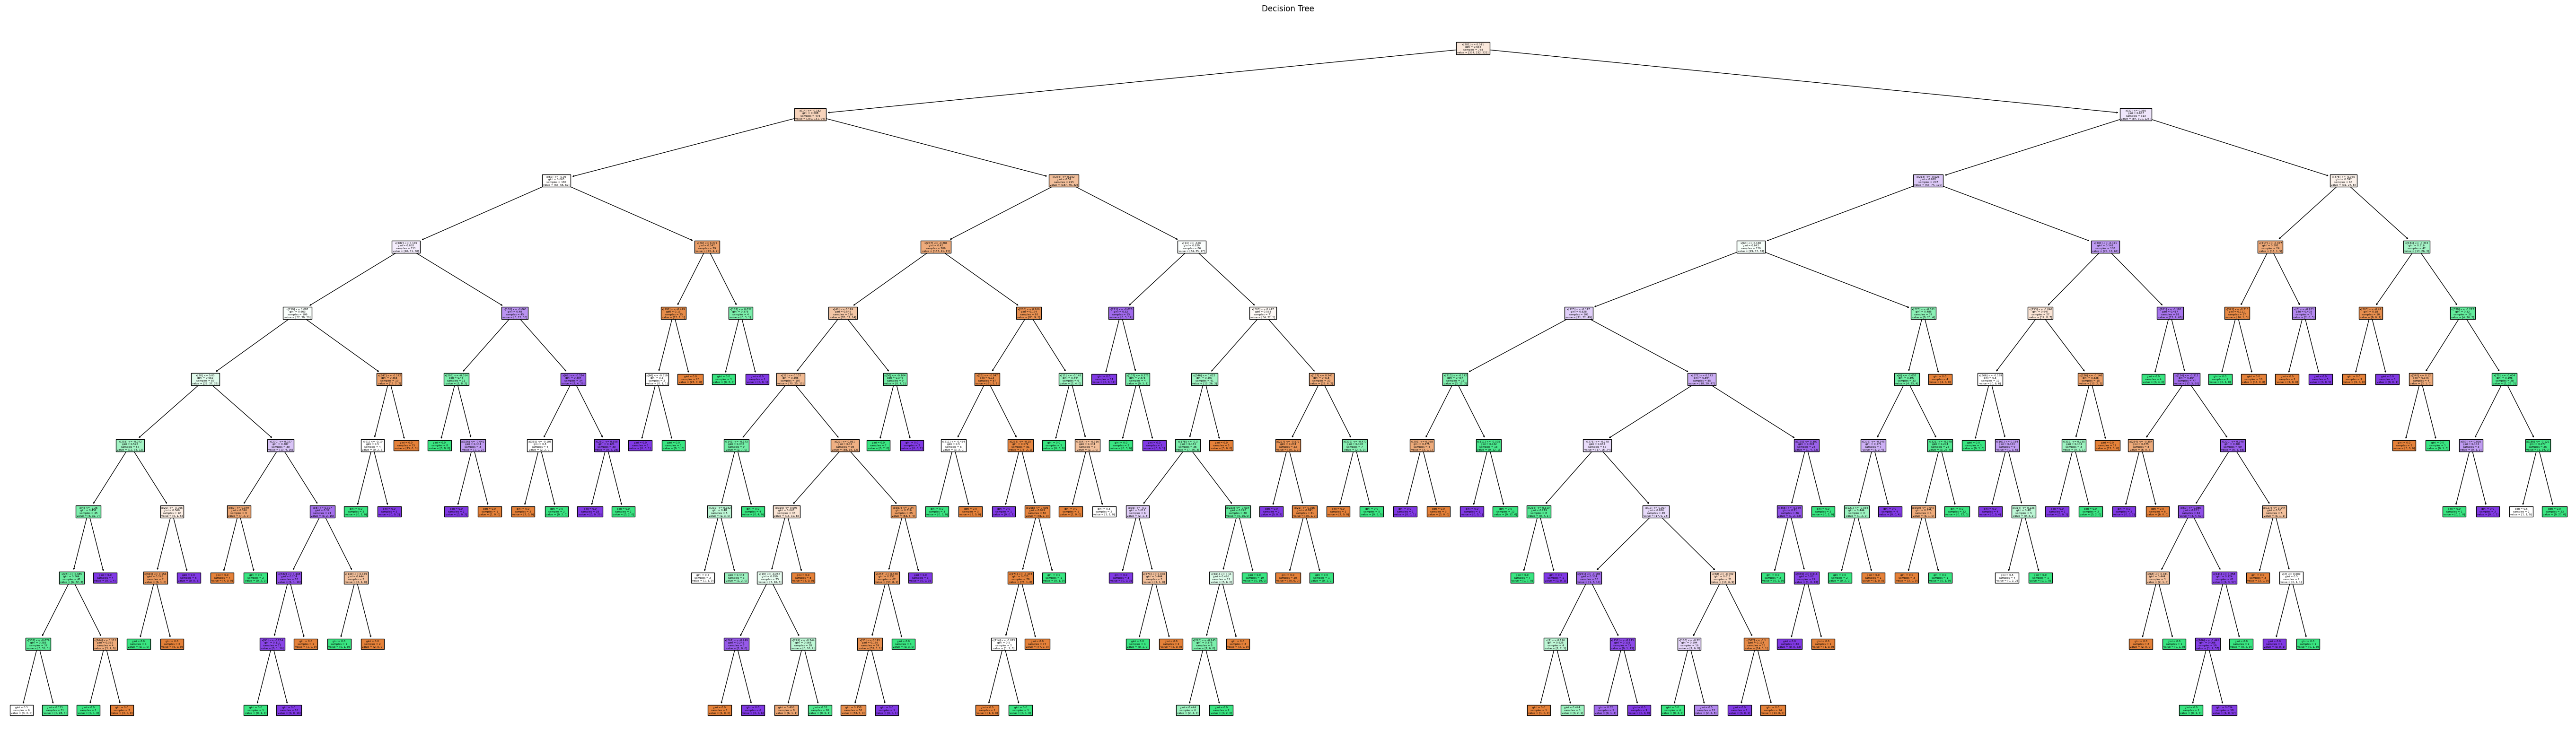

Accuracy score: 0.4319526627218935
Confusion Matrix: [[71 44 34]
 [25 27 33]
 [22 34 48]]
Classification Report:               precision    recall  f1-score   support

           0       0.60      0.48      0.53       149
           1       0.26      0.32      0.28        85
           2       0.42      0.46      0.44       104

    accuracy                           0.43       338
   macro avg       0.43      0.42      0.42       338
weighted avg       0.46      0.43      0.44       338



In [50]:
model_dtree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0)
model_dtree.fit(X_train , Y_train )
training_accuracy = model_dtree.score(X_train , Y_train )
testing_accuracy = model_dtree.score(X_test, Y_test)
print("Training Set Accuracy:", training_accuracy)
print("Testing Set Accuracy:", testing_accuracy)
tree_depth = model_dtree.get_depth()
print("Tree Depth:", tree_depth)

mp.figure(figsize=(70, 20))
plot_tree(model_dtree, filled=True)
mp.title("Decision Tree")
mp.show()
dt_predictions = model_dtree.predict(X_test)
print('Accuracy score:', accuracy_score(Y_test, dt_predictions))
print('Confusion Matrix:', confusion_matrix(Y_test, dt_predictions))
print('Classification Report:', classification_report(Y_test, dt_predictions))

### Cross Validation

In [52]:
crossvalidation(model_dtree,X,Y)

Accuracy: Mean - 0.4768805309734514  Std - 0.0412144928142785
Precision: Mean - 0.48658423167357967  Std - 0.039672034827997756
Recall: Mean - 0.4768805309734514  Std - 0.0412144928142785
F1 Score: Mean - 0.47740657291176614  Std - 0.03960480632404979


### After PCA

Training Set Accuracy: 0.9111675126903553
Testing Set Accuracy: 0.4349112426035503
Tree Depth: 10


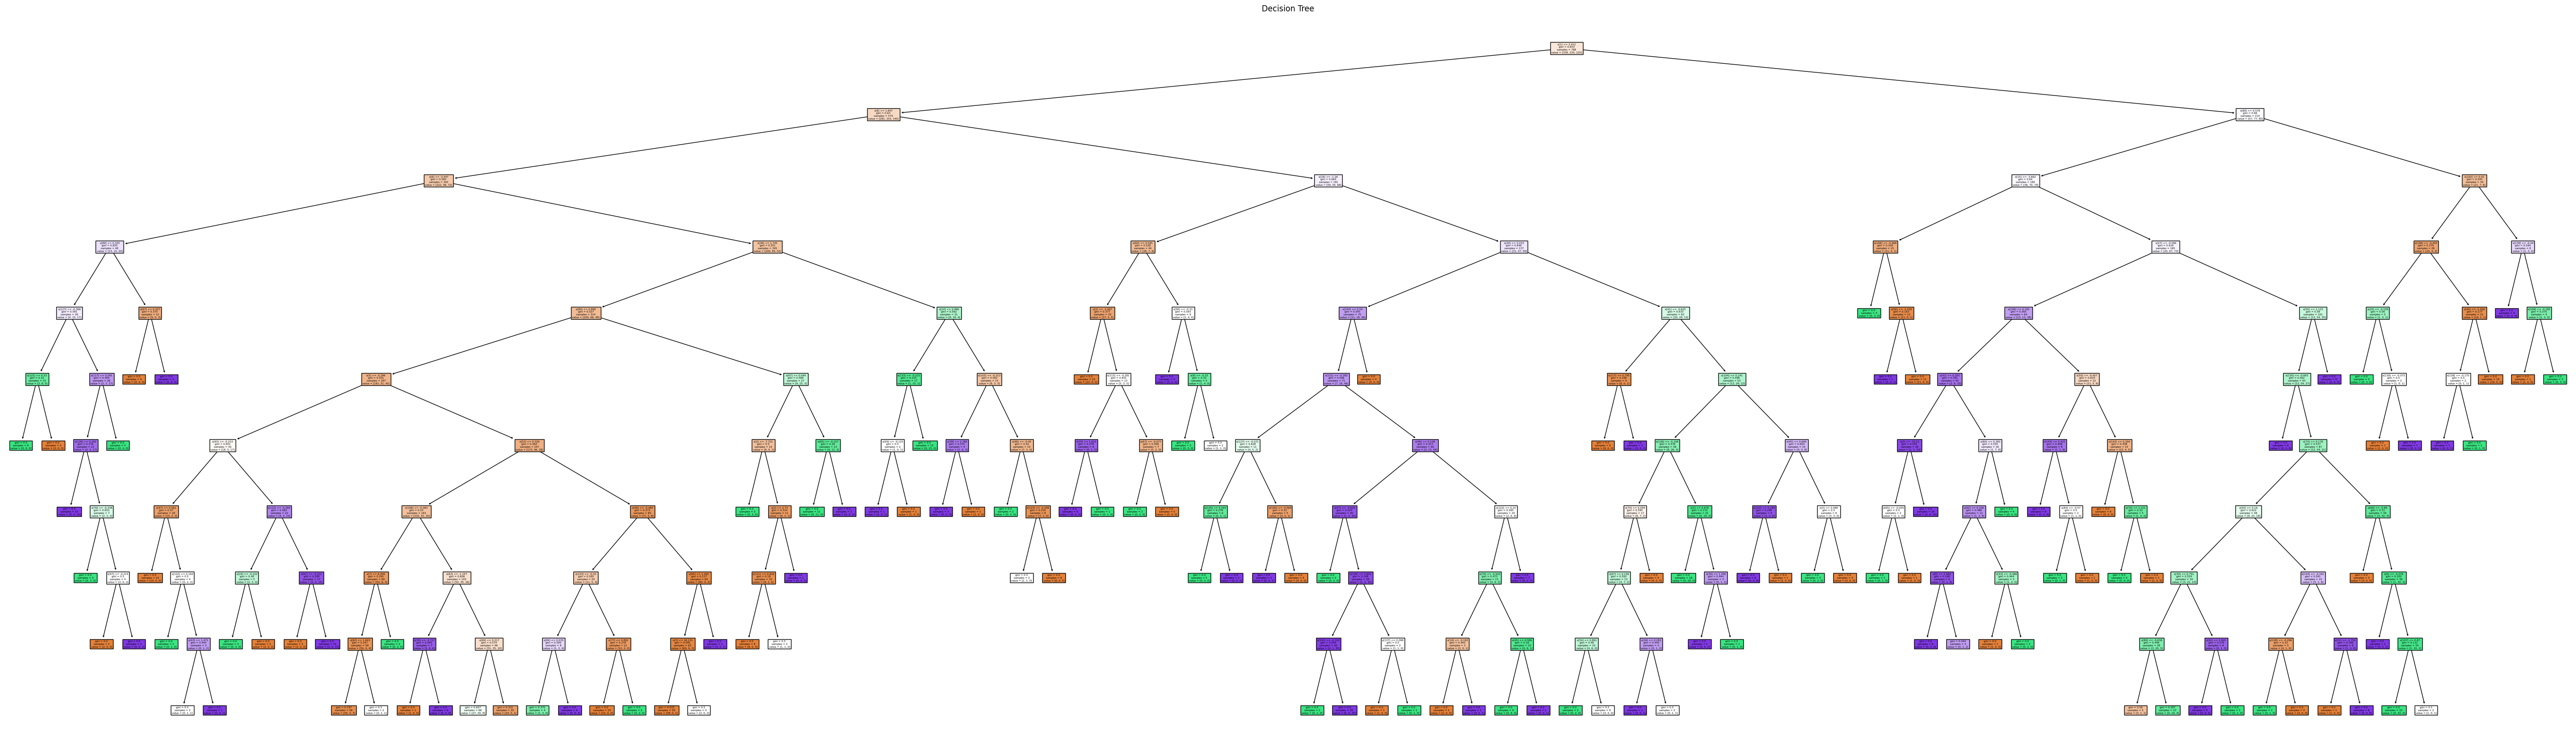

Accuracy score: 0.4349112426035503
Confusion Matrix: [[71 39 35]
 [25 35 27]
 [38 27 41]]
Classification Report:               precision    recall  f1-score   support

           0       0.53      0.49      0.51       145
           1       0.35      0.40      0.37        87
           2       0.40      0.39      0.39       106

    accuracy                           0.43       338
   macro avg       0.42      0.43      0.42       338
weighted avg       0.44      0.43      0.44       338



In [53]:
model_dtree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0)
model_dtree.fit(X_train_pca , Y_train_pca )
training_accuracy = model_dtree.score(X_train_pca , Y_train_pca )
testing_accuracy = model_dtree.score(X_test_pca, Y_test_pca)
print("Training Set Accuracy:", training_accuracy)
print("Testing Set Accuracy:", testing_accuracy)
tree_depth = model_dtree.get_depth()
print("Tree Depth:", tree_depth)

mp.figure(figsize=(70, 20))
plot_tree(model_dtree, filled=True)
mp.title("Decision Tree")
mp.show()
dt_predictions = model_dtree.predict(X_test_pca)
print('Accuracy score:', accuracy_score(Y_test_pca, dt_predictions))
print('Confusion Matrix:', confusion_matrix(Y_test_pca, dt_predictions))
print('Classification Report:', classification_report(Y_test_pca, dt_predictions))

In [54]:
crossvalidation(model_dtree,X_pca,Y)

Accuracy: Mean - 0.47420986093552464  Std - 0.0469753217183794
Precision: Mean - 0.4769020052214574  Std - 0.0386523166862407
Recall: Mean - 0.47420986093552464  Std - 0.0469753217183794
F1 Score: Mean - 0.4709181877517083  Std - 0.046410971125940816


### Hyperparameter tuning

In [ ]:
# Define the parameter grid to search
tree_params = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best"],
    "max_depth": range(1, 21),
    # "min_samples_split": range(2, 11),
    # "max_features": ["auto", "sqrt", "log2", None]
}

decision_tree = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
tree_grid = GridSearchCV(estimator=decision_tree, param_grid=tree_params, cv=cv, scoring='accuracy', n_jobs=-1, error_score=0)
tree_grid_results = tree_grid.fit(X_train, Y_train)

final_model_tree = decision_tree.set_params(**tree_grid_results.best_params_)
final_model_tree.fit(X_train, Y_train)

tree_predictions = final_model_tree.predict(X_test)
print('Accuracy score:', accuracy_score(Y_test, tree_predictions))
print('Confusion Matrix:', confusion_matrix(Y_test, tree_predictions))
print('Classification Report:', classification_report(Y_test, tree_predictions))
print('Best Parameters:', tree_grid_results.best_params_)

Accuracy score: 0.46745562130177515
Confusion Matrix: [[87 32 34]
 [37 41 22]
 [34 21 30]]
Classification Report:               precision    recall  f1-score   support

           0       0.55      0.57      0.56       153
           1       0.44      0.41      0.42       100
           2       0.35      0.35      0.35        85

    accuracy                           0.47       338
   macro avg       0.45      0.44      0.44       338
weighted avg       0.47      0.47      0.47       338

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}


### Cross Validation

In [ ]:
crossvalidation(final_model_tree,X_pca,Y)   

Accuracy: Mean - 0.46887642225031606  Std - 0.04004244311796507
Precision: Mean - 0.4760104974440716  Std - 0.037300346987615245
Recall: Mean - 0.46887642225031606  Std - 0.04004244311796507
F1 Score: Mean - 0.4683281759396107  Std - 0.03816270678317416


## 4) Naive Bayes

In [58]:
model_NB = GaussianNB(var_smoothing = 1e-07) #training naive bayes classifier
model_NB.fit(X_train, Y_train)
# Predict on the test set
nb_predictions = model_NB.predict(X_test)
print('Accuracy score of Naive Bayes classifier :', accuracy_score(Y_test, nb_predictions))
print('Confusion Matrix:', confusion_matrix(Y_test, nb_predictions))
print('Classification Report:', classification_report(Y_test, nb_predictions))

Accuracy score of Naive Bayes classifier : 0.46153846153846156
Confusion Matrix: [[73 49 27]
 [24 46 15]
 [31 36 37]]
Classification Report:               precision    recall  f1-score   support

           0       0.57      0.49      0.53       149
           1       0.35      0.54      0.43        85
           2       0.47      0.36      0.40       104

    accuracy                           0.46       338
   macro avg       0.46      0.46      0.45       338
weighted avg       0.48      0.46      0.46       338



### Cross Validation

In [59]:
crossvalidation(model_NB,X,Y)

Accuracy: Mean - 0.4778603034134007  Std - 0.054611229539239525
Precision: Mean - 0.4948102125470696  Std - 0.05894841190369637
Recall: Mean - 0.4778603034134007  Std - 0.054611229539239525
F1 Score: Mean - 0.4784112937751269  Std - 0.057270350677229034


### After PCA

In [60]:
model_NB = GaussianNB(var_smoothing = 1e-07) 
model_NB.fit(X_train_pca, Y_train_pca)
# Predict on the test set
nb_predictions = model_NB.predict(X_test_pca)
print('Accuracy score of Naive Bayes classifier :', accuracy_score(Y_test_pca, nb_predictions))
print('Confusion Matrix:', confusion_matrix(Y_test_pca, nb_predictions))
print('Classification Report:', classification_report(Y_test_pca, nb_predictions))

Accuracy score of Naive Bayes classifier : 0.41124260355029585
Confusion Matrix: [[54 30 61]
 [30 25 32]
 [26 20 60]]
Classification Report:               precision    recall  f1-score   support

           0       0.49      0.37      0.42       145
           1       0.33      0.29      0.31        87
           2       0.39      0.57      0.46       106

    accuracy                           0.41       338
   macro avg       0.41      0.41      0.40       338
weighted avg       0.42      0.41      0.41       338



In [61]:
crossvalidation(model_NB,X_pca,Y)

Accuracy: Mean - 0.4573640960809103  Std - 0.029851495684280485
Precision: Mean - 0.4846981597241419  Std - 0.03082344480659785
Recall: Mean - 0.4573640960809103  Std - 0.029851495684280485
F1 Score: Mean - 0.46149077425006035  Std - 0.029623936398268717


### Hyperparameter Tuning

In [ ]:
# Define the parameters
nb_params = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5] 
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
nb_grid = GridSearchCV(estimator=model_NB, param_grid=nb_params, cv=cv, scoring='accuracy', n_jobs=-1, error_score=0)
nb_grid_results = nb_grid.fit(X_train, Y_train)

final_model_nb = GaussianNB(var_smoothing=nb_grid_results.best_params_['var_smoothing'])
final_model_nb.fit(X_train, Y_train)

nb_predictions = final_model_nb.predict(X_test)
print('Accuracy score:', accuracy_score(Y_test, nb_predictions))
print('Confusion Matrix:', confusion_matrix(Y_test, nb_predictions))
print('Classification Report:', classification_report(Y_test, nb_predictions))
print('Best Parameters:', nb_grid_results.best_params_)


Accuracy score: 0.42011834319526625
Confusion Matrix: [[60 54 39]
 [37 45 18]
 [22 26 37]]
Classification Report:               precision    recall  f1-score   support

           0       0.50      0.39      0.44       153
           1       0.36      0.45      0.40       100
           2       0.39      0.44      0.41        85

    accuracy                           0.42       338
   macro avg       0.42      0.43      0.42       338
weighted avg       0.43      0.42      0.42       338

Best Parameters: {'var_smoothing': 1e-07}


### Cross Validation

In [ ]:
crossvalidation(final_model_nb,X_pca,Y)

Accuracy: Mean - 0.4520306573957017  Std - 0.020447341087334123
Precision: Mean - 0.4815990363349198  Std - 0.02211512917745167
Recall: Mean - 0.4520306573957017  Std - 0.020447341087334123
F1 Score: Mean - 0.4564622131670112  Std - 0.02087824964891232


## 5) ADA Boost

In [64]:
base_estimator = DecisionTreeClassifier(max_depth=1)  # Using a decision tree stump as the base estimator
model_ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Training the AdaBoost classifier
model_ada_boost.fit(X_train, Y_train)

# Making predictions on the test set
predictions_ada = model_ada_boost.predict(X_test)

# Calculating accuracy
print('Accuracy of AdaBoost classifier:', accuracy_score(Y_test, predictions_ada))
print('Confusion Matrix:', confusion_matrix(Y_test, predictions_ada))
print('Classification Report:', classification_report(Y_test, predictions_ada))

Accuracy of AdaBoost classifier: 0.5118343195266272
Confusion Matrix: [[91 35 23]
 [34 30 21]
 [25 27 52]]
Classification Report:               precision    recall  f1-score   support

           0       0.61      0.61      0.61       149
           1       0.33      0.35      0.34        85
           2       0.54      0.50      0.52       104

    accuracy                           0.51       338
   macro avg       0.49      0.49      0.49       338
weighted avg       0.52      0.51      0.51       338



### Cross Validation

In [65]:
crossvalidation(model_ada_boost,X,Y)

Accuracy: Mean - 0.4769200379266751  Std - 0.043457109093307356
Precision: Mean - 0.4794924132024006  Std - 0.04911737400308443
Recall: Mean - 0.4769200379266751  Std - 0.043457109093307356
F1 Score: Mean - 0.47247334274813546  Std - 0.04580017648062657


### After PCA

In [70]:
base_estimator = DecisionTreeClassifier(max_depth=1)
model_ada_boost = AdaBoostClassifier(learning_rate=0.1, base_estimator=base_estimator, n_estimators=100, random_state=42)

# Training the AdaBoost classifier
model_ada_boost.fit(X_train_pca, Y_train_pca)

# Making predictions on the test set
predictions_ada = model_ada_boost.predict(X_test_pca)

# Calculating accuracy
print('Accuracy of AdaBoost classifier:', accuracy_score(Y_test_pca, predictions_ada))
print('Confusion Matrix:', confusion_matrix(Y_test_pca, predictions_ada))
print('Classification Report:', classification_report(Y_test_pca, predictions_ada))

Accuracy of AdaBoost classifier: 0.5295857988165681
Confusion Matrix: [[118  17  10]
 [ 52  18  17]
 [ 42  21  43]]
Classification Report:               precision    recall  f1-score   support

           0       0.56      0.81      0.66       145
           1       0.32      0.21      0.25        87
           2       0.61      0.41      0.49       106

    accuracy                           0.53       338
   macro avg       0.50      0.48      0.47       338
weighted avg       0.51      0.53      0.50       338



In [71]:
crossvalidation(model_ada_boost,X_pca,Y)

Accuracy: Mean - 0.4885192793931732  Std - 0.04445378905169049
Precision: Mean - 0.45791458741792157  Std - 0.06562756610634472
Recall: Mean - 0.4885192793931732  Std - 0.04445378905169049
F1 Score: Mean - 0.4392826393973225  Std - 0.04917666200106968


### Hperparameter tuning

In [ ]:
# Define the parameter grid to search
ada_params = {
    "n_estimators": [50, 100, 150], 
    "learning_rate": [0.1, 0.5, 1.0]
}

# Create AdaBoost model
ada = AdaBoostClassifier(random_state=42)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
ada_grid = GridSearchCV(estimator=ada, param_grid=ada_params, cv=cv, scoring='accuracy', n_jobs=-1, error_score=0)
ada_grid_results = ada_grid.fit(X_train, Y_train)

final_model_ada = AdaBoostClassifier(**ada_grid_results.best_params_, random_state=42)
final_model_ada.fit(X_train, Y_train)

ada_predictions = final_model_ada.predict(X_test)
print('Accuracy score:', accuracy_score(Y_test, ada_predictions))
print('Confusion Matrix:', confusion_matrix(Y_test, ada_predictions))
print('Classification Report:', classification_report(Y_test, ada_predictions))
print('Best Parameters:', ada_grid_results.best_params_)

Accuracy score: 0.4970414201183432
Confusion Matrix: [[122  15  16]
 [ 70  10  20]
 [ 39  10  36]]
Classification Report:               precision    recall  f1-score   support

           0       0.53      0.80      0.64       153
           1       0.29      0.10      0.15       100
           2       0.50      0.42      0.46        85

    accuracy                           0.50       338
   macro avg       0.44      0.44      0.41       338
weighted avg       0.45      0.50      0.45       338

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}


### Cross Validation

## 6) XG Boost

In [72]:
# Initialize and train the XGBoost model
model_xgboost = XGBClassifier()
model_xgboost.fit(X_train, Y_train)


# Make predictions on the test set
xgboost_predictions = model_xgboost.predict(X_test)

# Evaluate the model (for example, using accuracy)
print('Accuracy of XGBoost classifier:', accuracy_score(Y_test, xgboost_predictions))
print('Confusion Matrix:', confusion_matrix(Y_test, xgboost_predictions))
print('Classification Report:', classification_report(Y_test, xgboost_predictions))

Accuracy of XGBoost classifier: 0.5532544378698225
Confusion Matrix: [[106  19  24]
 [ 20  33  32]
 [ 26  30  48]]
Classification Report:               precision    recall  f1-score   support

           0       0.70      0.71      0.70       149
           1       0.40      0.39      0.40        85
           2       0.46      0.46      0.46       104

    accuracy                           0.55       338
   macro avg       0.52      0.52      0.52       338
weighted avg       0.55      0.55      0.55       338



### Cross Validation

In [73]:
crossvalidation(model_xgboost,X,Y)

Accuracy: Mean - 0.5941213653603035  Std - 0.04127834696858332
Precision: Mean - 0.5950287325601813  Std - 0.033122980075030804
Recall: Mean - 0.5941213653603035  Std - 0.04127834696858332
F1 Score: Mean - 0.5891291015644489  Std - 0.03892703873937425


### After PCA

In [251]:
# Initialize and train the XGBoost model
model_xgboost = XGBClassifier()
model_xgboost.fit(X_train_pca, Y_train_pca)


# Make predictions on the test set
xgboost_predictions = model_xgboost.predict(X_test_pca)

# Evaluate the model (for example, using accuracy)
print('Accuracy of XGBoost classifier:', accuracy_score(Y_test_pca, xgboost_predictions))
print('Confusion Matrix:', confusion_matrix(Y_test_pca, xgboost_predictions))
print('Classification Report:', classification_report(Y_test_pca, xgboost_predictions))

Accuracy of XGBoost classifier: 0.5680473372781065
Confusion Matrix: [[109  24  12]
 [ 30  36  21]
 [ 33  26  47]]
Classification Report:               precision    recall  f1-score   support

           0       0.63      0.75      0.69       145
           1       0.42      0.41      0.42        87
           2       0.59      0.44      0.51       106

    accuracy                           0.57       338
   macro avg       0.55      0.54      0.54       338
weighted avg       0.56      0.57      0.56       338



In [252]:
crossvalidation(model_xgboost,X_pca,Y)

Accuracy: Mean - 0.5647835018963338  Std - 0.05280726366900649
Precision: Mean - 0.5603382680609589  Std - 0.04944377181466431
Recall: Mean - 0.5647835018963338  Std - 0.05280726366900649
F1 Score: Mean - 0.5567800338395219  Std - 0.05228395680520101


### Hperparameter tuning

In [74]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

KeyboardInterrupt: 

## 7) CAT Boost

In [212]:
# Initializing CatBoost classifier
model_catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42)

# Training the CatBoost classifier
model_catboost.fit(X_train, Y_train, eval_set=(X_test, Y_test), early_stopping_rounds=10, verbose=10)

# Making predictions on the test set
catboost_predictions = model_catboost.predict(X_test)

# Calculating accuracy
print('Accuracy of CAT boost classifier:', accuracy_score(Y_test, catboost_predictions))
print('Confusion Matrix:', confusion_matrix(Y_test, catboost_predictions))
print('Classification Report:', classification_report(Y_test, catboost_predictions))

0:	learn: 1.0805519	test: 1.0890830	best: 1.0890830 (0)	total: 107ms	remaining: 10.6s
10:	learn: 0.9419129	test: 1.0200216	best: 1.0200216 (10)	total: 1.08s	remaining: 8.75s
20:	learn: 0.8515997	test: 0.9863142	best: 0.9863142 (20)	total: 2.11s	remaining: 7.93s
30:	learn: 0.7874392	test: 0.9685368	best: 0.9685368 (30)	total: 3.59s	remaining: 7.99s
40:	learn: 0.7291469	test: 0.9560097	best: 0.9560097 (40)	total: 4.63s	remaining: 6.66s
50:	learn: 0.6857407	test: 0.9477904	best: 0.9477904 (50)	total: 6.24s	remaining: 6s
60:	learn: 0.6393776	test: 0.9364103	best: 0.9364103 (60)	total: 7.39s	remaining: 4.72s
70:	learn: 0.6035616	test: 0.9295240	best: 0.9295240 (70)	total: 8.6s	remaining: 3.51s
80:	learn: 0.5637640	test: 0.9237981	best: 0.9230074 (79)	total: 9.71s	remaining: 2.28s
90:	learn: 0.5224310	test: 0.9192770	best: 0.9189785 (89)	total: 10.8s	remaining: 1.07s
99:	learn: 0.4897418	test: 0.9161943	best: 0.9158499 (98)	total: 12.1s	remaining: 0us

bestTest = 0.9158499154
bestIteration =

### Cross Validation

In [ ]:
crossvalidation(model_catboost,X,Y)

Accuracy: Mean - 0.5577038558786346  Std - 0.03773568922717215
Precision: Mean - 0.5556070998971206  Std - 0.03498561121273538
Recall: Mean - 0.5577038558786346  Std - 0.03773568922717215
F1 Score: Mean - 0.5419629686240828  Std - 0.035891654035635656


### After PCA

In [206]:
# Initializing CatBoost classifier
model_catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42)

# Training the CatBoost classifier
model_catboost.fit(X_train_pca, Y_train_pca, eval_set=(X_test_pca, Y_test_pca), early_stopping_rounds=10, verbose=10)

# Making predictions on the test set
catboost_predictions = model_catboost.predict(X_test_pca)

# Calculating accuracy
print('Accuracy of CAT boost classifier:', accuracy_score(Y_test_pca, catboost_predictions))
print('Confusion Matrix:', confusion_matrix(Y_test_pca, catboost_predictions))
print('Classification Report:', classification_report(Y_test_pca, catboost_predictions))

0:	learn: 1.0799251	test: 1.0908655	best: 1.0908655 (0)	total: 92.7ms	remaining: 9.17s
10:	learn: 0.9795480	test: 1.0559096	best: 1.0559096 (10)	total: 515ms	remaining: 4.17s
20:	learn: 0.8894044	test: 1.0241566	best: 1.0241566 (20)	total: 901ms	remaining: 3.39s
30:	learn: 0.8204332	test: 1.0105076	best: 1.0105076 (30)	total: 1.27s	remaining: 2.84s
40:	learn: 0.7623906	test: 0.9932423	best: 0.9932423 (40)	total: 1.66s	remaining: 2.38s
50:	learn: 0.7112326	test: 0.9843637	best: 0.9843637 (50)	total: 2.12s	remaining: 2.03s
60:	learn: 0.6596969	test: 0.9780311	best: 0.9780311 (60)	total: 2.51s	remaining: 1.61s
70:	learn: 0.6096599	test: 0.9649182	best: 0.9649182 (70)	total: 2.89s	remaining: 1.18s
80:	learn: 0.5656954	test: 0.9570040	best: 0.9570040 (80)	total: 3.28s	remaining: 771ms
90:	learn: 0.5180532	test: 0.9471840	best: 0.9466446 (89)	total: 3.67s	remaining: 363ms
99:	learn: 0.4840088	test: 0.9425411	best: 0.9425411 (99)	total: 4.02s	remaining: 0us

bestTest = 0.9425410821
bestIterat

## 8) Multi-Layer Perceptron

In [236]:
model_mlp = MLPClassifier(hidden_layer_sizes=(300, 50),alpha=0.00001, activation='relu', solver='adam',  max_iter=1000)
model_mlp.fit(X_train, Y_train) # Fitting the model to the training data
mlp_y_pred = model_mlp.predict(X_test) #predicting

mlp_accuracy = accuracy_score(Y_test, mlp_y_pred)
mlp_report = classification_report(Y_test, mlp_y_pred)

print("Accuracy of the MLP classifier:", mlp_accuracy)
print("Classification Report:\n", mlp_report)
print('Confusion Matrix:', confusion_matrix(Y_test, mlp_y_pred))

Accuracy of the MLP classifier: 0.6094674556213018
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       149
           1       0.39      0.36      0.38        85
           2       0.59      0.61      0.60       104

    accuracy                           0.61       338
   macro avg       0.57      0.57      0.57       338
weighted avg       0.60      0.61      0.61       338

Confusion Matrix: [[112  26  11]
 [ 22  31  32]
 [ 19  22  63]]


### Cross Validation

In [237]:
crossvalidation(model_mlp,X,Y)

Accuracy: Mean - 0.5852481036662452  Std - 0.04301703784829801
Precision: Mean - 0.5986413005716479  Std - 0.04038272832278653
Recall: Mean - 0.5852481036662452  Std - 0.04301703784829801
F1 Score: Mean - 0.5850373765800339  Std - 0.045328374368542805


### After PCA

In [260]:
model_mlp = MLPClassifier(hidden_layer_sizes=(300, 60),alpha=0.000001, activation='relu', solver='adam', learning_rate='constant', max_iter=1000)
model_mlp.fit(X_train_pca, Y_train_pca) # Fitting the model to the training data
mlp_y_pred = model_mlp.predict(X_test_pca) #predicting

mlp_accuracy = accuracy_score(Y_test_pca, mlp_y_pred)
mlp_report = classification_report(Y_test_pca, mlp_y_pred)

print("Accuracy of the MLP classifier:", mlp_accuracy)
print("Classification Report:\n", mlp_report)
print('Confusion Matrix:', confusion_matrix(Y_test_pca, mlp_y_pred))

Accuracy of the MLP classifier: 0.5976331360946746
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.67       145
           1       0.52      0.48      0.50        87
           2       0.56      0.58      0.57       106

    accuracy                           0.60       338
   macro avg       0.58      0.58      0.58       338
weighted avg       0.60      0.60      0.60       338

Confusion Matrix: [[98 23 24]
 [21 42 24]
 [28 16 62]]


In [257]:
crossvalidation(model_mlp,X_pca,Y)

Accuracy: Mean - 0.6039190897597977  Std - 0.04048845270680391
Precision: Mean - 0.6124526614439775  Std - 0.04253241335474511
Recall: Mean - 0.6039190897597977  Std - 0.04048845270680391
F1 Score: Mean - 0.6023739015508185  Std - 0.04219310504125141


### Hperparameter tuning

In [ ]:
#NEW CODE FOR MLP HYPERPARAMETER TUNING
mlp_params = {
    "hidden_layer_sizes": [(50,), (100,)],  
    "activation": ["relu", "tanh",  "logistic"],
    "solver": ["adam", "sgd"],
    "alpha": [0.0001, 0.001],
    "learning_rate": ["constant"],
}

# Create MLP model
mlp = MLPClassifier(random_state=42)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
mlp_grid = GridSearchCV(estimator=mlp, param_grid=mlp_params, cv=cv, scoring='accuracy', n_jobs=-1, error_score=0)
mlp_grid_results = mlp_grid.fit(X_train, Y_train)

final_model_mlp = MLPClassifier(**mlp_grid_results.best_params_, random_state=42)
final_model_mlp.fit(X_train, Y_train)

mlp_predictions = final_model_mlp.predict(X_test)
print('Accuracy score:', accuracy_score(Y_test, mlp_predictions))
print('Confusion Matrix:', confusion_matrix(Y_test, mlp_predictions))
print('Classification Report:', classification_report(Y_test, mlp_predictions))
print('Best Parameters:', mlp_grid_results.best_params_)

Accuracy score: 0.5443786982248521
Confusion Matrix: [[108  23  20]
 [ 33  27  26]
 [ 27  25  49]]
Classification Report:               precision    recall  f1-score   support

           0       0.64      0.72      0.68       151
           1       0.36      0.31      0.34        86
           2       0.52      0.49      0.50       101

    accuracy                           0.54       338
   macro avg       0.51      0.50      0.50       338
weighted avg       0.53      0.54      0.54       338

Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}


### Cross Validation

In [ ]:
crossvalidation(final_model_mlp,X_pca,Y)

Accuracy: Mean - 0.5870022123893806  Std - 0.042721489388663346
Precision: Mean - 0.5952249267618097  Std - 0.040725968909318046
Recall: Mean - 0.5870022123893806  Std - 0.042721489388663346
F1 Score: Mean - 0.5867740926929865  Std - 0.04461312935415124


## 9) Random Forest

In [149]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)
rf_predictions = model_rf.predict(X_test)
print('Accuracy score:', accuracy_score(Y_test, rf_predictions))
print('Confusion Matrix:', confusion_matrix(Y_test, rf_predictions))
print('Classification Report:', classification_report(Y_test, rf_predictions))

Accuracy score: 0.6094674556213018
Confusion Matrix: [[118  16  15]
 [ 31  33  21]
 [ 31  18  55]]
Classification Report:               precision    recall  f1-score   support

           0       0.66      0.79      0.72       149
           1       0.49      0.39      0.43        85
           2       0.60      0.53      0.56       104

    accuracy                           0.61       338
   macro avg       0.58      0.57      0.57       338
weighted avg       0.60      0.61      0.60       338



### Cross Validation

In [150]:
crossvalidation(model_rf,X,Y)

Accuracy: Mean - 0.5985066371681416  Std - 0.04704590505132604
Precision: Mean - 0.594557189619005  Std - 0.03731199771583508
Recall: Mean - 0.5985066371681416  Std - 0.04704590505132604
F1 Score: Mean - 0.5832923926872643  Std - 0.04634394572856563


### After PCA

In [264]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, Y_train_pca)
rf_predictions = model_rf.predict(X_test_pca)
print('Accuracy score:', accuracy_score(Y_test_pca, rf_predictions))
print('Confusion Matrix:', confusion_matrix(Y_test_pca, rf_predictions))
print('Classification Report:', classification_report(Y_test_pca, rf_predictions))

Accuracy score: 0.5828402366863905
Confusion Matrix: [[122  10  13]
 [ 47  27  13]
 [ 42  16  48]]
Classification Report:               precision    recall  f1-score   support

           0       0.58      0.84      0.69       145
           1       0.51      0.31      0.39        87
           2       0.65      0.45      0.53       106

    accuracy                           0.58       338
   macro avg       0.58      0.53      0.53       338
weighted avg       0.58      0.58      0.56       338



In [159]:
crossvalidation(model_rf,X_pca,Y)

Accuracy: Mean - 0.5611962705436156  Std - 0.04814518060004556
Precision: Mean - 0.5537124503232149  Std - 0.04522062848185398
Recall: Mean - 0.5611962705436156  Std - 0.04814518060004556
F1 Score: Mean - 0.5330544261922598  Std - 0.05360658207751431


## 10) Logistic Regression Classifier

In [178]:
model_logistic = LogisticRegression(solver='sag')
model_logistic.fit(X_train, Y_train)

predicted_logistic_reg = model_logistic.predict(X_test)
#calculating accuracy score of the model
print("Accuracy of the logistic regression classifier: ", accuracy_score(Y_test, predicted_logistic_reg))
print('Confusion Matrix:', confusion_matrix(Y_test, predicted_logistic_reg))
print('Classification Report:', classification_report(Y_test, predicted_logistic_reg))

Accuracy of the logistic regression classifier:  0.5857988165680473
Confusion Matrix: [[97 28 24]
 [24 41 20]
 [24 20 60]]
Classification Report:               precision    recall  f1-score   support

           0       0.67      0.65      0.66       149
           1       0.46      0.48      0.47        85
           2       0.58      0.58      0.58       104

    accuracy                           0.59       338
   macro avg       0.57      0.57      0.57       338
weighted avg       0.59      0.59      0.59       338



### Cross Validation

In [180]:
crossvalidation(model_logistic,X,Y)

Accuracy: Mean - 0.5666561314791404  Std - 0.03553857545990418
Precision: Mean - 0.5692780421096202  Std - 0.03554303444514166
Recall: Mean - 0.5666561314791404  Std - 0.03553857545990418
F1 Score: Mean - 0.5626159897702191  Std - 0.03707414897015913


### After PCA

In [181]:
model_logistic = LogisticRegression(solver='sag')
model_logistic.fit(X_train_pca, Y_train_pca)

predicted_logistic_reg = model_logistic.predict(X_test_pca)
#calculating accuracy score of the model
print("Accuracy of the logistic regression classifier: ", accuracy_score(Y_test_pca, predicted_logistic_reg))
print('Confusion Matrix:', confusion_matrix(Y_test_pca, predicted_logistic_reg))
print('Classification Report:', classification_report(Y_test_pca, predicted_logistic_reg))

Accuracy of the logistic regression classifier:  0.5443786982248521
Confusion Matrix: [[99 22 24]
 [30 34 23]
 [29 26 51]]
Classification Report:               precision    recall  f1-score   support

           0       0.63      0.68      0.65       145
           1       0.41      0.39      0.40        87
           2       0.52      0.48      0.50       106

    accuracy                           0.54       338
   macro avg       0.52      0.52      0.52       338
weighted avg       0.54      0.54      0.54       338



In [182]:
crossvalidation(model_logistic,X_pca,Y)

Accuracy: Mean - 0.5710176991150442  Std - 0.03928388033204591
Precision: Mean - 0.57286916169349  Std - 0.030973166224230693
Recall: Mean - 0.5710176991150442  Std - 0.03928388033204591
F1 Score: Mean - 0.5674016481669361  Std - 0.03971433353282287


# LIME

In [184]:
from lime import lime_tabular
from sklearn.svm import SVC
# Split the dataset into training and testing sets
X_train_lime, X_test_lime, y_train_lime, y_test_lime = train_test_split(X, Y, test_size=0.2, random_state=42)
# print(X_test_lime.shape)  # Check the shape of X_test_lime
# print(type(X_test_lime))

#USING THE TRAINED & TUNED MLP MODEL
model_rf.fit(X_train_lime, y_train_lime)

rf_predictions_lime = model_rf.predict(X_test_lime)
print('Accuracy score:', accuracy_score(y_test_lime, rf_predictions_lime))

# Choose an instance for explanation (e.g., the first instance in the test set)
instance_to_explain = X_test_lime.iloc[9]
 
# Create a LIME explainer
explainer = lime_tabular.LimeTabularExplainer(X_train_lime.values, mode='classification', feature_names=[f"Feature {i}" for i in range(X.shape[1])])
 
# Explain the instance's prediction
exp = explainer.explain_instance(instance_to_explain, model_rf.predict_proba, num_features=10)
 
# Visualize the explanation
exp.show_in_notebook(show_table=True, show_all=False)

Accuracy score: 0.6150442477876106


In [185]:
print(y_test_lime.iloc[9])

class_encoded    2
Name: 950, dtype: int64


# Bagging SVM and MLP

In [189]:
svm_predictions_ = model_SVM.predict(X_test_pca)
mlp_predictions_ = model_mlp.predict(X_test_pca)

# Combine predictions for a meta-learner (e.g., Random Forest)
combined_predictions_svm_mlp = np.column_stack((svm_predictions_, mlp_predictions_))

meta_learner_svm_mlp = RandomForestClassifier()
meta_learner_svm_mlp.fit(combined_predictions_svm_mlp, Y_test_pca)
final_predictions_svm_mlp = meta_learner_svm_mlp.predict(combined_predictions_svm_mlp)

accuracy_svm_mlp = accuracy_score(Y_test_pca, final_predictions_svm_mlp)
print(f"Accuracy of the ensemble model: {accuracy_svm_mlp}")

# Generate a classification report
report_svm_mlp = classification_report(Y_test_pca, final_predictions_svm_mlp)
print(f"Classification Report:\n{report_svm_mlp}")

Accuracy of the ensemble model: 0.6183431952662722
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       145
           1       0.50      0.59      0.54        87
           2       0.69      0.46      0.55       106

    accuracy                           0.62       338
   macro avg       0.62      0.60      0.60       338
weighted avg       0.63      0.62      0.61       338



In [240]:
crossvalidation(meta_learner_svm_mlp,X,Y)

Accuracy: Mean - 0.6056336915297094  Std - 0.04690137233794829
Precision: Mean - 0.6007067059576835  Std - 0.04224320884685206
Recall: Mean - 0.6056336915297094  Std - 0.04690137233794829
F1 Score: Mean - 0.5931786907732033  Std - 0.04669542793792659


### LIME on SVM & MLP ensembled model

In [191]:
lime_ensembled_model = meta_learner_svm_mlp
lime_ensembled_model.fit(X_train_lime, y_train_lime)
predictions_lime = lime_ensembled_model.predict(X_test_lime)
print('Accuracy score:', accuracy_score(y_test_lime,predictions_lime))

# Choose an instance for explanation (e.g., the first instance in the test set)
instance_to_explain = X_test_lime.iloc[9]
 
# Create a LIME explainer
explainer = lime_tabular.LimeTabularExplainer(X_train_lime.values, mode='classification', feature_names=[f"Feature {i}" for i in range(X.shape[1])])
 
# Explain the instance's prediction
exp = explainer.explain_instance(instance_to_explain, lime_ensembled_model.predict_proba, num_features=10)
 
# Visualize the explanation
exp.show_in_notebook(show_table=True, show_all=False)

Accuracy score: 0.6194690265486725


In [209]:
lime_ensembled_model2 = meta_learner_svm_mlp
lime_ensembled_model2.fit(X_train_pca, Y_train_pca)
predictions_lime2 = lime_ensembled_model2.predict(X_test_pca)
print('Accuracy score:', accuracy_score(Y_test_pca,predictions_lime2))

# Choose an instance for explanation (e.g., the first instance in the test set)
instance_to_explain2 = X_test_pca.iloc[9]
 
# Create a LIME explainer
explainer2 = lime_tabular.LimeTabularExplainer(X_train_lime.values, mode='classification', feature_names=[f"Feature {i}" for i in range(X.shape[1])])
 
# Explain the instance's prediction
exp2 = explainer2.explain_instance(instance_to_explain2, lime_ensembled_model2.predict_proba, num_features=10)
 
# Visualize the explanation
exp2.show_in_notebook(show_table=True, show_all=False)

Accuracy score: 0.5532544378698225


IndexError: index 145 is out of bounds for axis 0 with size 145

# Bagging Logistic Regression and SVM

In [196]:
svm_predictions_ = model_SVM.predict(X_test_pca)
logistic_predictions_ = model_logistic.predict(X_test_pca)

# Combine predictions for a meta-learner (e.g., Random Forest)
combined_predictions_svm_logistic = np.column_stack((svm_predictions_, logistic_predictions_))

meta_learner_svm_logistic = RandomForestClassifier()
meta_learner_svm_logistic.fit(combined_predictions_svm_logistic, Y_test_pca)
final_predictions_svm_logistic = meta_learner_svm_logistic.predict(combined_predictions_svm_logistic)

accuracy_svm_logistic = accuracy_score(Y_test_pca, final_predictions_svm_logistic)
print(f"Accuracy of the ensemble model: {accuracy_svm_logistic}")

# Generate a classification report
report_svm_logistic = classification_report(Y_test_pca, final_predictions_svm_logistic)
print(f"Classification Report:\n{report_svm_logistic}")

Accuracy of the ensemble model: 0.606508875739645
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.81      0.70       145
           1       0.55      0.32      0.41        87
           2       0.61      0.56      0.58       106

    accuracy                           0.61       338
   macro avg       0.59      0.56      0.56       338
weighted avg       0.60      0.61      0.59       338



In [244]:
crossvalidation(meta_learner_svm_logistic,X,Y)

Accuracy: Mean - 0.5879740834386852  Std - 0.040517776522687565
Precision: Mean - 0.5796758738086971  Std - 0.04225556135583471
Recall: Mean - 0.5879740834386852  Std - 0.040517776522687565
F1 Score: Mean - 0.5737586369549926  Std - 0.044673447956429


# Bagging SVM & CATBoost

In [216]:
svm_predictions_ = model_SVM.predict(X_test)
cat_predictions_ = model_catboost.predict(X_test)

# Combine predictions for a meta-learner (e.g., Random Forest)
combined_predictions_svm_cat = np.column_stack((svm_predictions_, cat_predictions_))

meta_learner_svm_cat = RandomForestClassifier()
meta_learner_svm_cat.fit(combined_predictions_svm_cat, Y_test)
final_predictions_svm_cat = meta_learner_svm_cat.predict(combined_predictions_svm_cat)

accuracy_svm_cat = accuracy_score(Y_test, final_predictions_svm_cat)
print(f"Accuracy of the ensemble model: {accuracy_svm_cat}")

# Generate a classification report
report_svm_cat = classification_report(Y_test, final_predictions_svm_cat)
print(f"Classification Report:\n{report_svm_cat}")

Accuracy of the ensemble model: 0.591715976331361
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       149
           1       0.48      0.27      0.35        85
           2       0.57      0.60      0.58       104

    accuracy                           0.59       338
   macro avg       0.56      0.55      0.54       338
weighted avg       0.58      0.59      0.57       338



# Bagging SVM and XGBoost

In [218]:
svm_predictions_ = model_SVM.predict(X_test)
xgb_predictions_ = model_xgboost.predict(X_test)

# Combine predictions for a meta-learner (e.g., Random Forest)
combined_predictions_svm_xgb = np.column_stack((svm_predictions_, xgb_predictions_))

meta_learner_svm_xgb = RandomForestClassifier()
meta_learner_svm_xgb.fit(combined_predictions_svm_xgb, Y_test)
final_predictions_svm_xgb = meta_learner_svm_xgb.predict(combined_predictions_svm_xgb)

accuracy_svm_xgb = accuracy_score(Y_test, final_predictions_svm_xgb)
print(f"Accuracy of the ensemble model: {accuracy_svm_xgb}")

# Generate a classification report
report_svm_xgb = classification_report(Y_test, final_predictions_svm_xgb)
print(f"Classification Report:\n{report_svm_xgb}")

Accuracy of the ensemble model: 0.606508875739645
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.69      0.70       149
           1       0.48      0.54      0.51        85
           2       0.57      0.54      0.55       104

    accuracy                           0.61       338
   macro avg       0.59      0.59      0.59       338
weighted avg       0.61      0.61      0.61       338



In [220]:
crossvalidation(meta_learner_svm_xgb,X,Y)

Accuracy: Mean - 0.5897123893805309  Std - 0.03737007290932488
Precision: Mean - 0.586757393772298  Std - 0.03048940536714857
Recall: Mean - 0.5897123893805309  Std - 0.03737007290932488
F1 Score: Mean - 0.5781065684889564  Std - 0.03748420892921473


# Soft Voting model

In [278]:
from sklearn.ensemble import VotingClassifier

# new_model_SVM = svm.SVC(probability=True, C=0.1, degree=4, gamma='auto', kernel='poly')
# new_model_SVM.fit(X_train, Y_train)
# new_model_mlp = MLPClassifier(hidden_layer_sizes=(300, 60),alpha=0.00001, activation='relu', solver='adam', learning_rate='constant', max_iter=1000)
# new_model_mlp.fit(X_train, Y_train)
# new_model_rf = RandomForestClassifier()
# new_model_rf.fit(X_train, Y_train)
# new_model_xgboost = XGBClassifier()
# new_model_xgboost.fit(X_train, Y_train)

voting_model = VotingClassifier(
    estimators=[
        ('svm', model_SVM),
        ('mlp', model_mlp),
        ('rf', model_rf),
        ('xgb', model_xgboost)
    ],
    voting='soft'  
)
voting_model.fit(X_train, Y_train)

# Make predictions on the test set
predictions_voting = voting_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions_voting)
print(f'Accuracy of the Hybrid Voting Model: {accuracy}')

Accuracy of the Hybrid Voting Model: 0.5887573964497042


# Hard Voting model

In [277]:
voting_model2 = VotingClassifier(
    estimators=[
        ('svm', model_SVM),
        ('mlp', model_mlp),
        ('rf', model_rf),
        ('xgb', model_xgboost),
        # ('logistic', model_logistic)
    ],
    voting='hard'  
)
voting_model2.fit(X_train, Y_train)

# Make predictions on the test set
predictions_voting2 = voting_model2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions_voting2)
print(f'Accuracy of the Hybrid Voting Model: {accuracy}')

Accuracy of the Hybrid Voting Model: 0.5680473372781065


# Boosting XGboost and ADAboost

In [282]:
base_model = XGBClassifier()
boosting_model = AdaBoostClassifier(base_model, n_estimators=100, random_state=1)
boosting_model.fit(X_train_pca, Y_train_pca)
boosting_predictions = boosting_model.predict(X_test_pca)
accuracy = accuracy_score(Y_test_pca, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.5473372781065089


## BoxPlot of Accuracy (Mean)

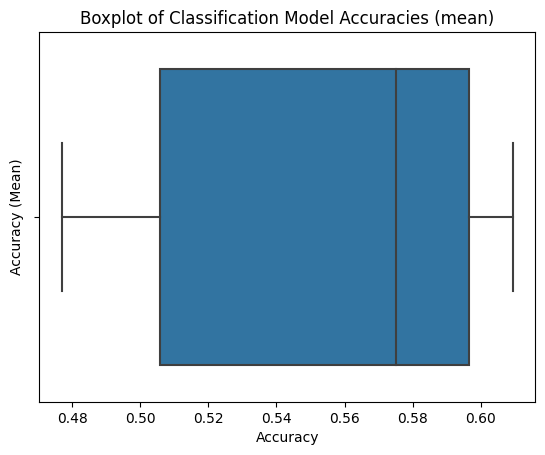

In [314]:
import seaborn as sns
import matplotlib.pyplot as plt
results = 'D:/!Semester 5/Machine Learning/my codes/ML PROJECT/roberta vs mathbert results.xlsx'
mathbert_results = pd.read_excel(results, sheet_name="mathbert rounded off")

accuracies_mean = mathbert_results.iloc[1:11, 1]
models = mathbert_results.iloc[1:11, 0]
sns.boxplot(x=accuracies_mean)

plt.ylabel("Accuracy (Mean)")
plt.title("Boxplot of Classification Model Accuracies (mean)")

# Show the plot
plt.show()

## BoxPlot of Accuracy (STD)

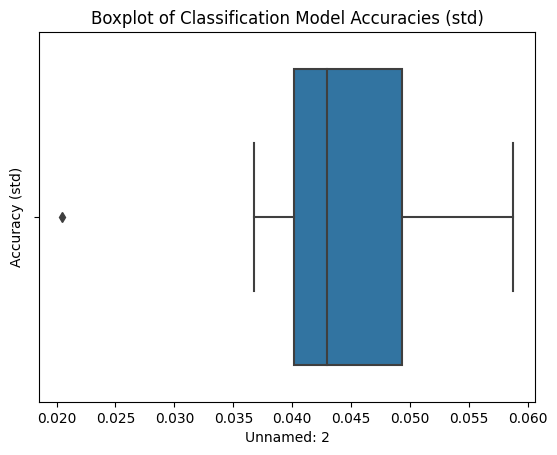

In [315]:
accuracies_std = mathbert_results.iloc[1:11, 2]
models = mathbert_results.iloc[1:11, 0]
sns.boxplot(x=accuracies_std)

plt.ylabel("Accuracy (std)")
plt.title("Boxplot of Classification Model Accuracies (std)")

# Show the plot
plt.show()